In [1]:
import matplotlib.pyplot as plt
import dungeon_generators as dg
from time import time
import matplotlib.pyplot as plt
import sys
import csv
sys.setrecursionlimit(99999999)

In [2]:
dungeon_generators = [dg.DungeonAldousBroder, dg.DungeonPrim, dg.DungeonBinaryTree, dg.DungeonDFS, dg.DungeonKruskal, dg.DungeonEller]
dungeon_sizes = [10, 20, 30, 40 , 50, 100]

In [3]:
dungeon_timers = { algorithm: [] for algorithm in dungeon_generators}

In [4]:
for size in dungeon_sizes:
    for algorithm in dungeon_generators:
        # print(f"Algoritmo: {algorithm.__name__}-{size}x{size}")
        start = time() 
        algorithm(height=size, width=size)
        end = time()
        dungeon_timers[algorithm].append(end - start)

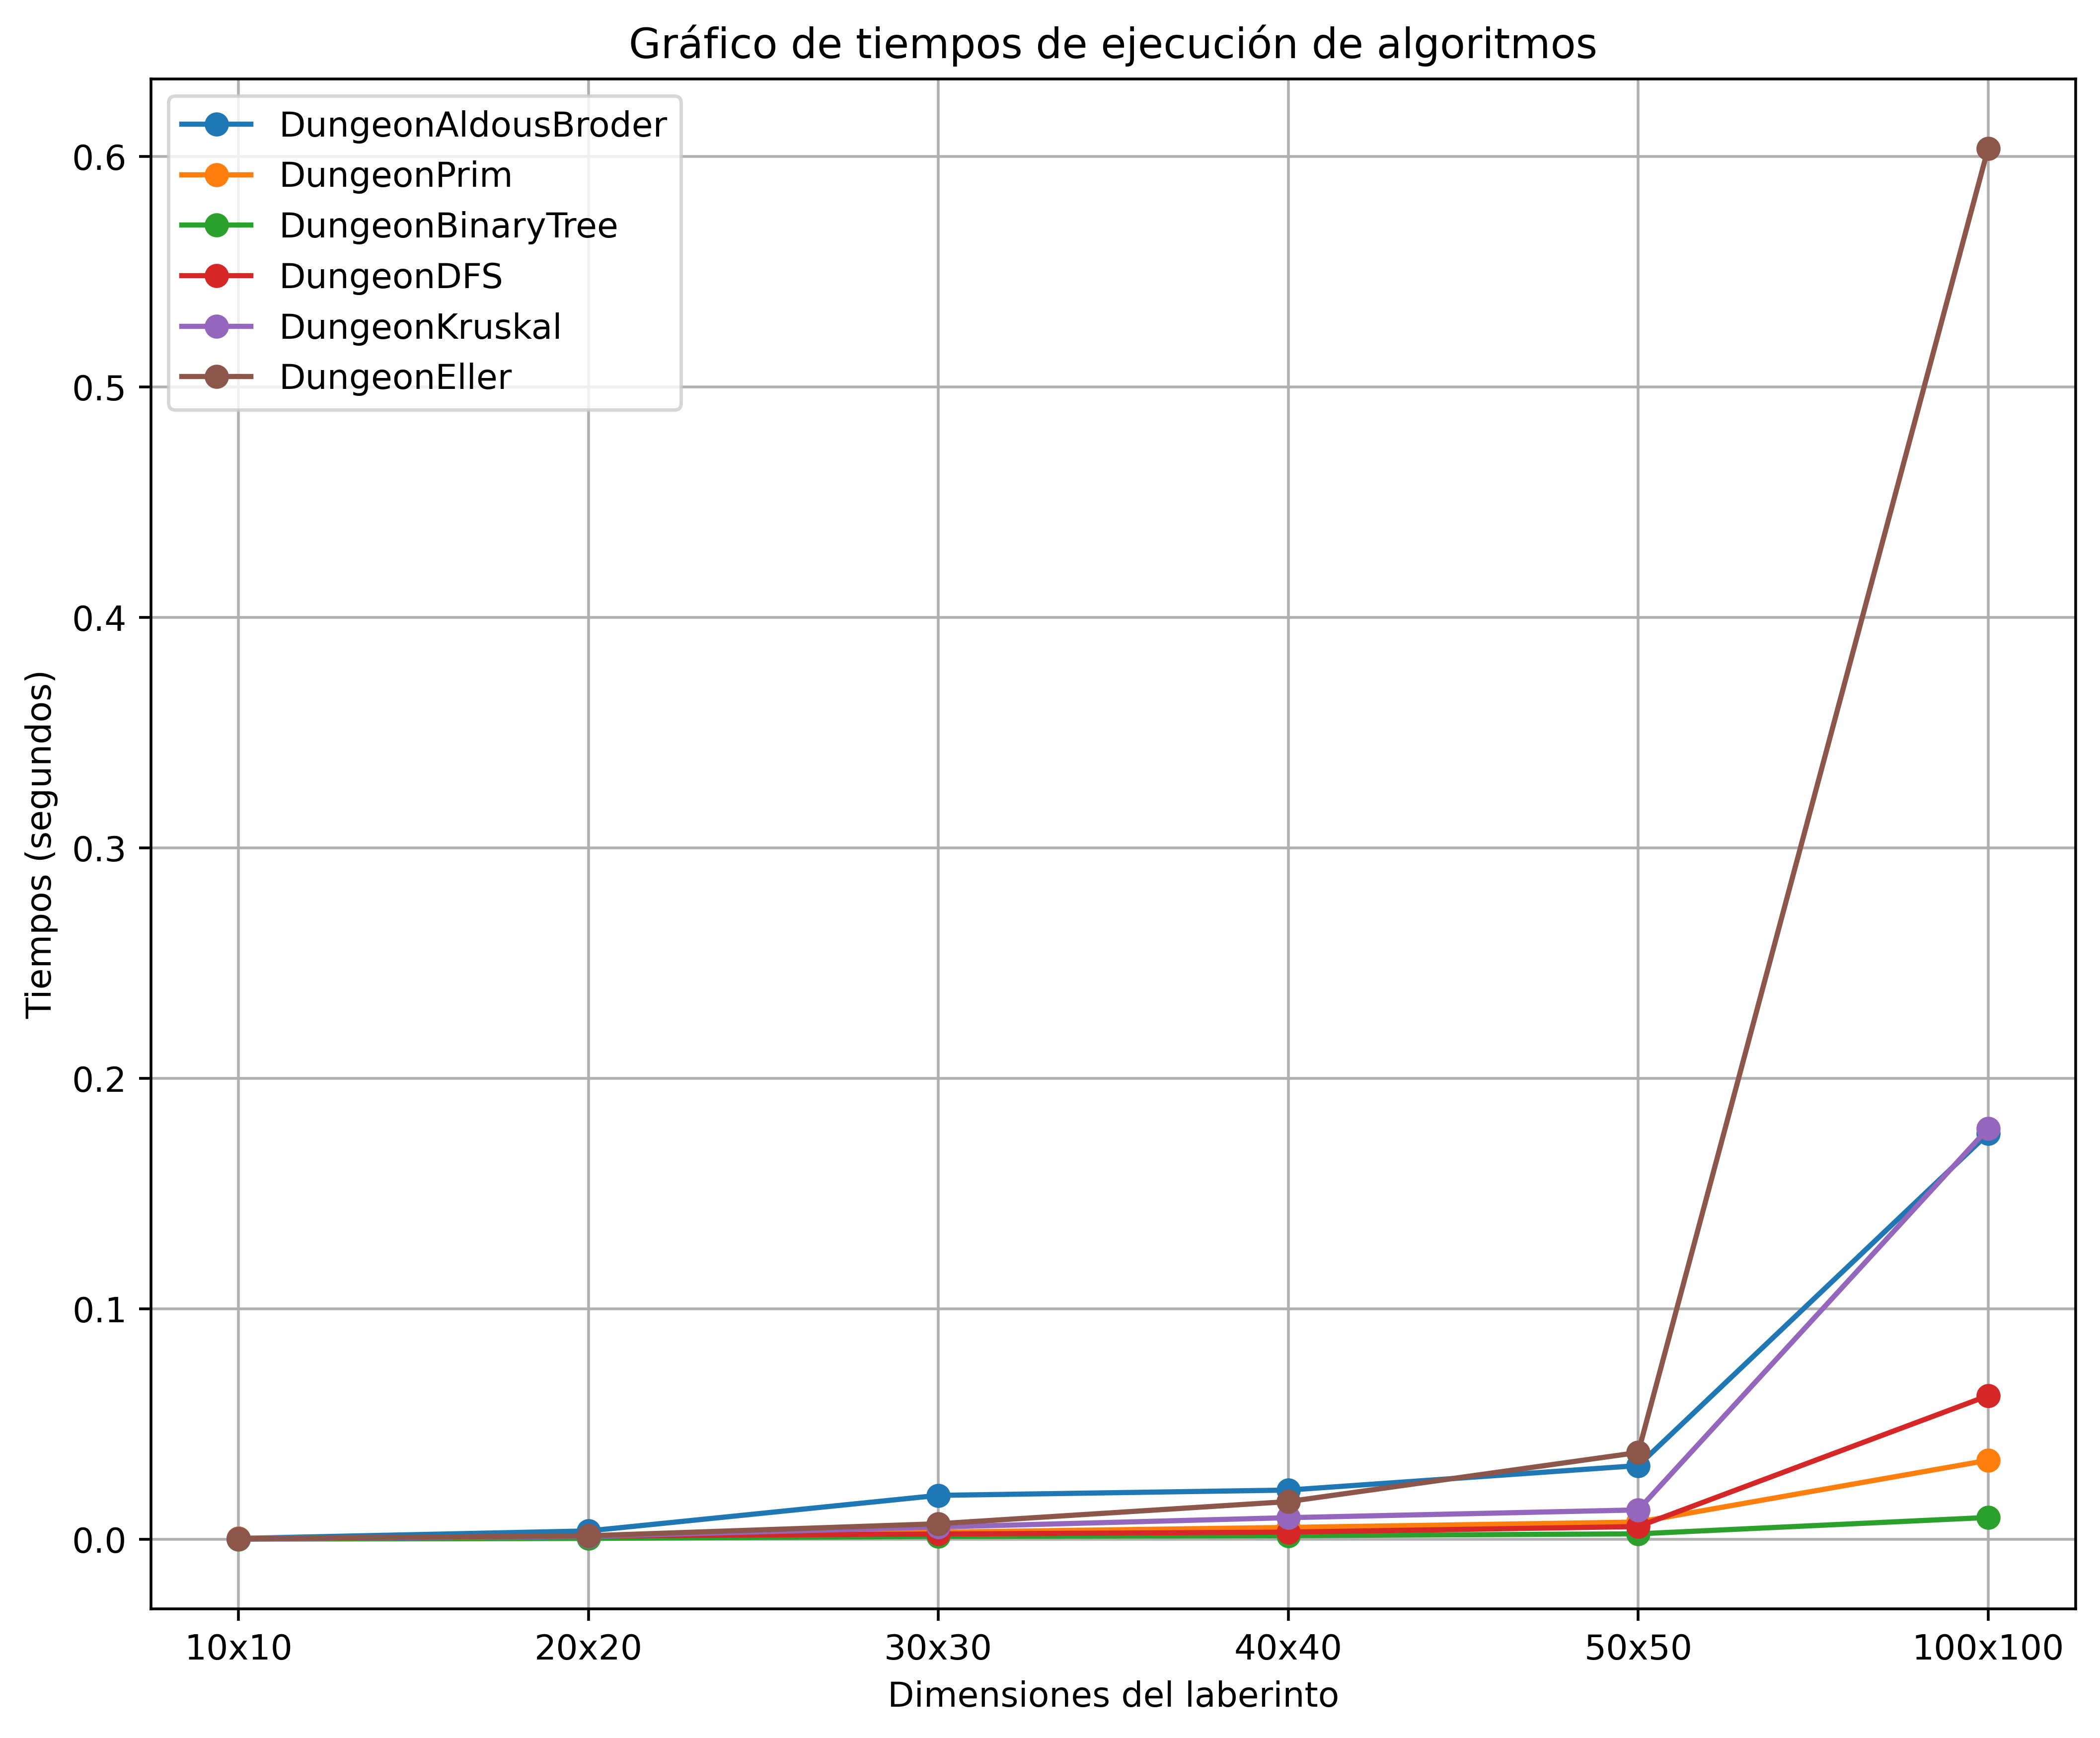

In [5]:
# plt.plot(dungeon_sizes, [i for i in range(dungeon_sizes)])
import matplotlib.pyplot as plt

# Crear el gráfico de líneas
plt.figure(figsize=(10,8), dpi=500)

for key, value in dungeon_timers.items():
    plt.plot([f"{str(size)}x{str(size)}" for size in dungeon_sizes], value, label=key.__name__, marker="o")

# Agregar título y etiquetas
plt.title('Gráfico de tiempos de ejecución de algoritmos')
plt.xlabel('Dimensiones del laberinto')
plt.ylabel('Tiempos (segundos)')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


In [6]:
with open("../sizeable-times.csv", "w") as file:
    csv_file = csv.writer(file)
    csv_file.writerow(("Algorithm",*[f"{d_size}x{d_size}" for d_size in dungeon_sizes]))

    for k,v in dungeon_timers.items():
        csv_file.writerow([k.__name__, *v])

In [7]:
cellular_timers = {}
for size in dungeon_sizes:
        start = time() 
        dg.DungeonCellular(height=size, width=size, max_iterations=500)
        end = time()
        cellular_timers[f"{size}x{size}"] = (end - start)
        print(f"{size}x{size},{end - start}")

10x10,0.7173469066619873
20x20,3.0547218322753906
30x30,7.791329622268677
40x40,12.673204183578491
50x50,20.61619806289673
100x100,87.82160878181458


/tmp/ipykernel_6406/4044676965.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


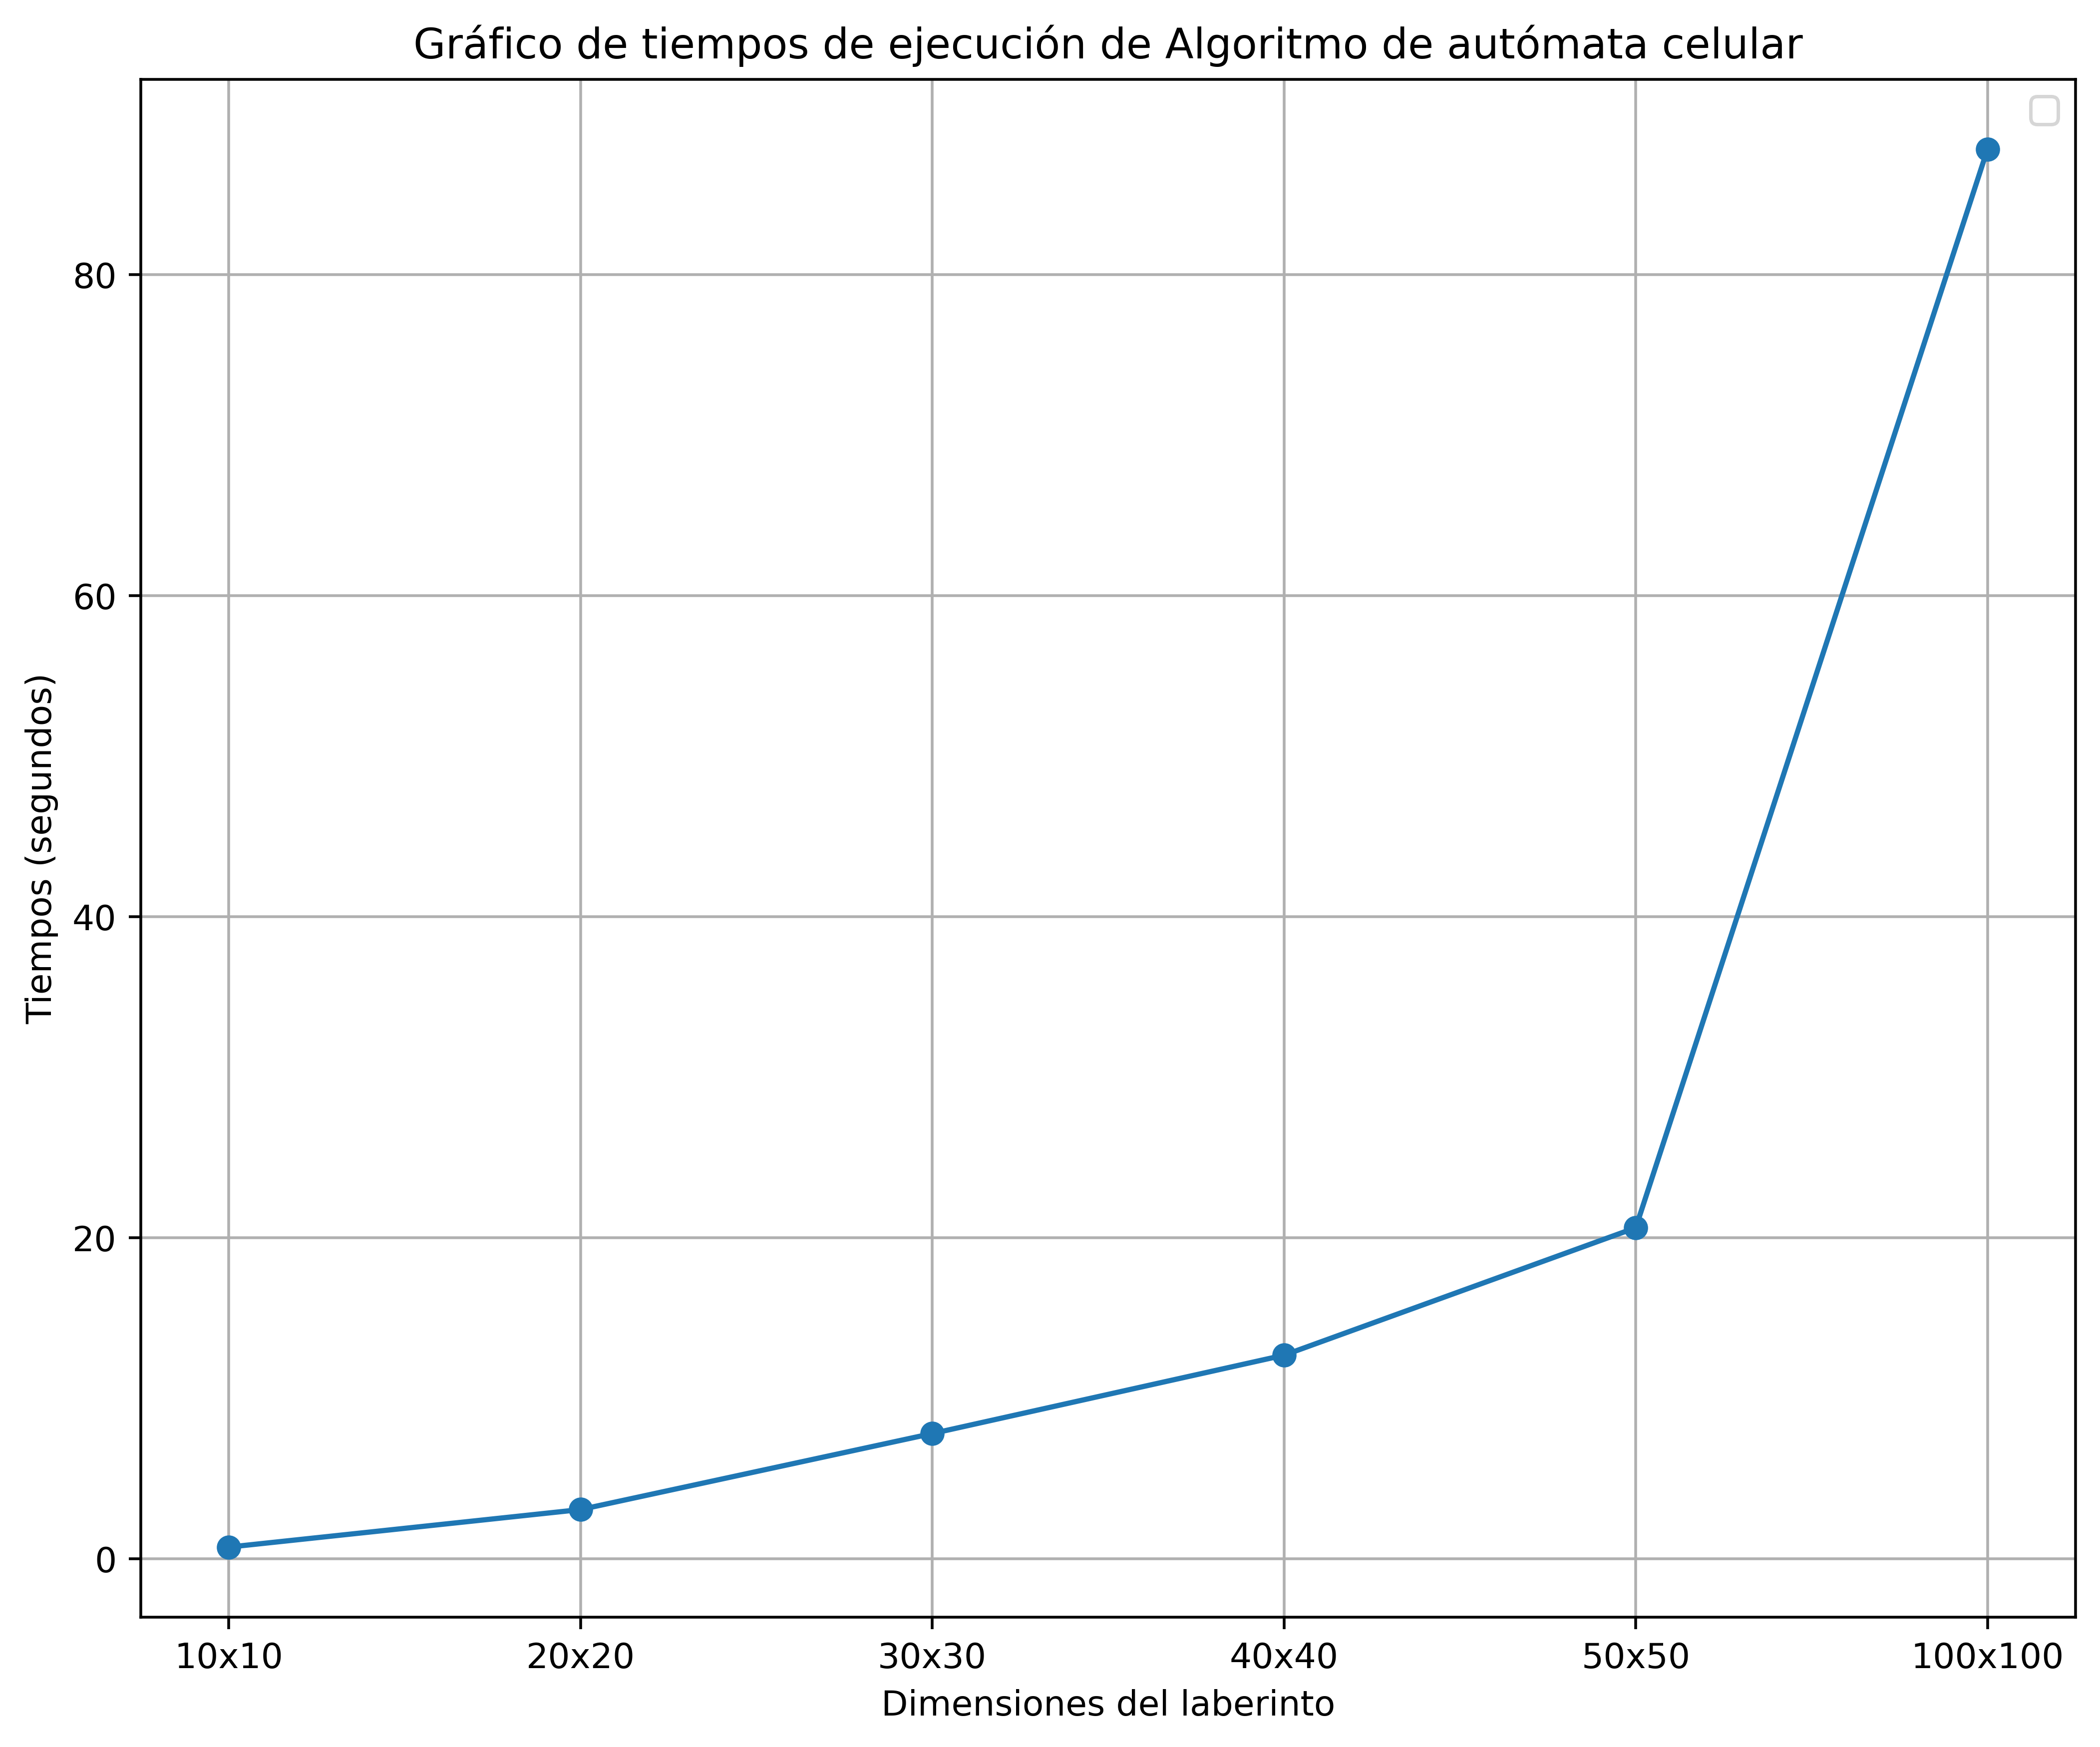

In [8]:
# plt.plot(dungeon_sizes, [i for i in range(dungeon_sizes)])
import matplotlib.pyplot as plt

# Crear el gráfico de líneas
plt.figure(figsize=(10,8), dpi=500)

plt.plot(cellular_timers.keys(), cellular_timers.values(), marker="o")

# Agregar título y etiquetas
plt.title('Gráfico de tiempos de ejecución de Algoritmo de autómata celular')
plt.xlabel('Dimensiones del laberinto')
plt.ylabel('Tiempos (segundos)')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [9]:
tesselation_timers = {}
iterations = list(range(1,11))
for it in iterations:
        start = time() 
        dg.DungeonTesselation(iters=it )
        end = time()
        tesselation_timers[it] = (end - start)
        print(f"{it} iteraciones, {end - start}")

1 iteraciones, 0.0003199577331542969
2 iteraciones, 0.0010027885437011719
3 iteraciones, 0.0037994384765625
4 iteraciones, 0.007957220077514648
5 iteraciones, 0.06735730171203613
6 iteraciones, 0.19394731521606445
7 iteraciones, 0.6076991558074951
8 iteraciones, 2.538796901702881
9 iteraciones, 9.494925260543823
10 iteraciones, 36.54077887535095


/tmp/ipykernel_6406/2451187708.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


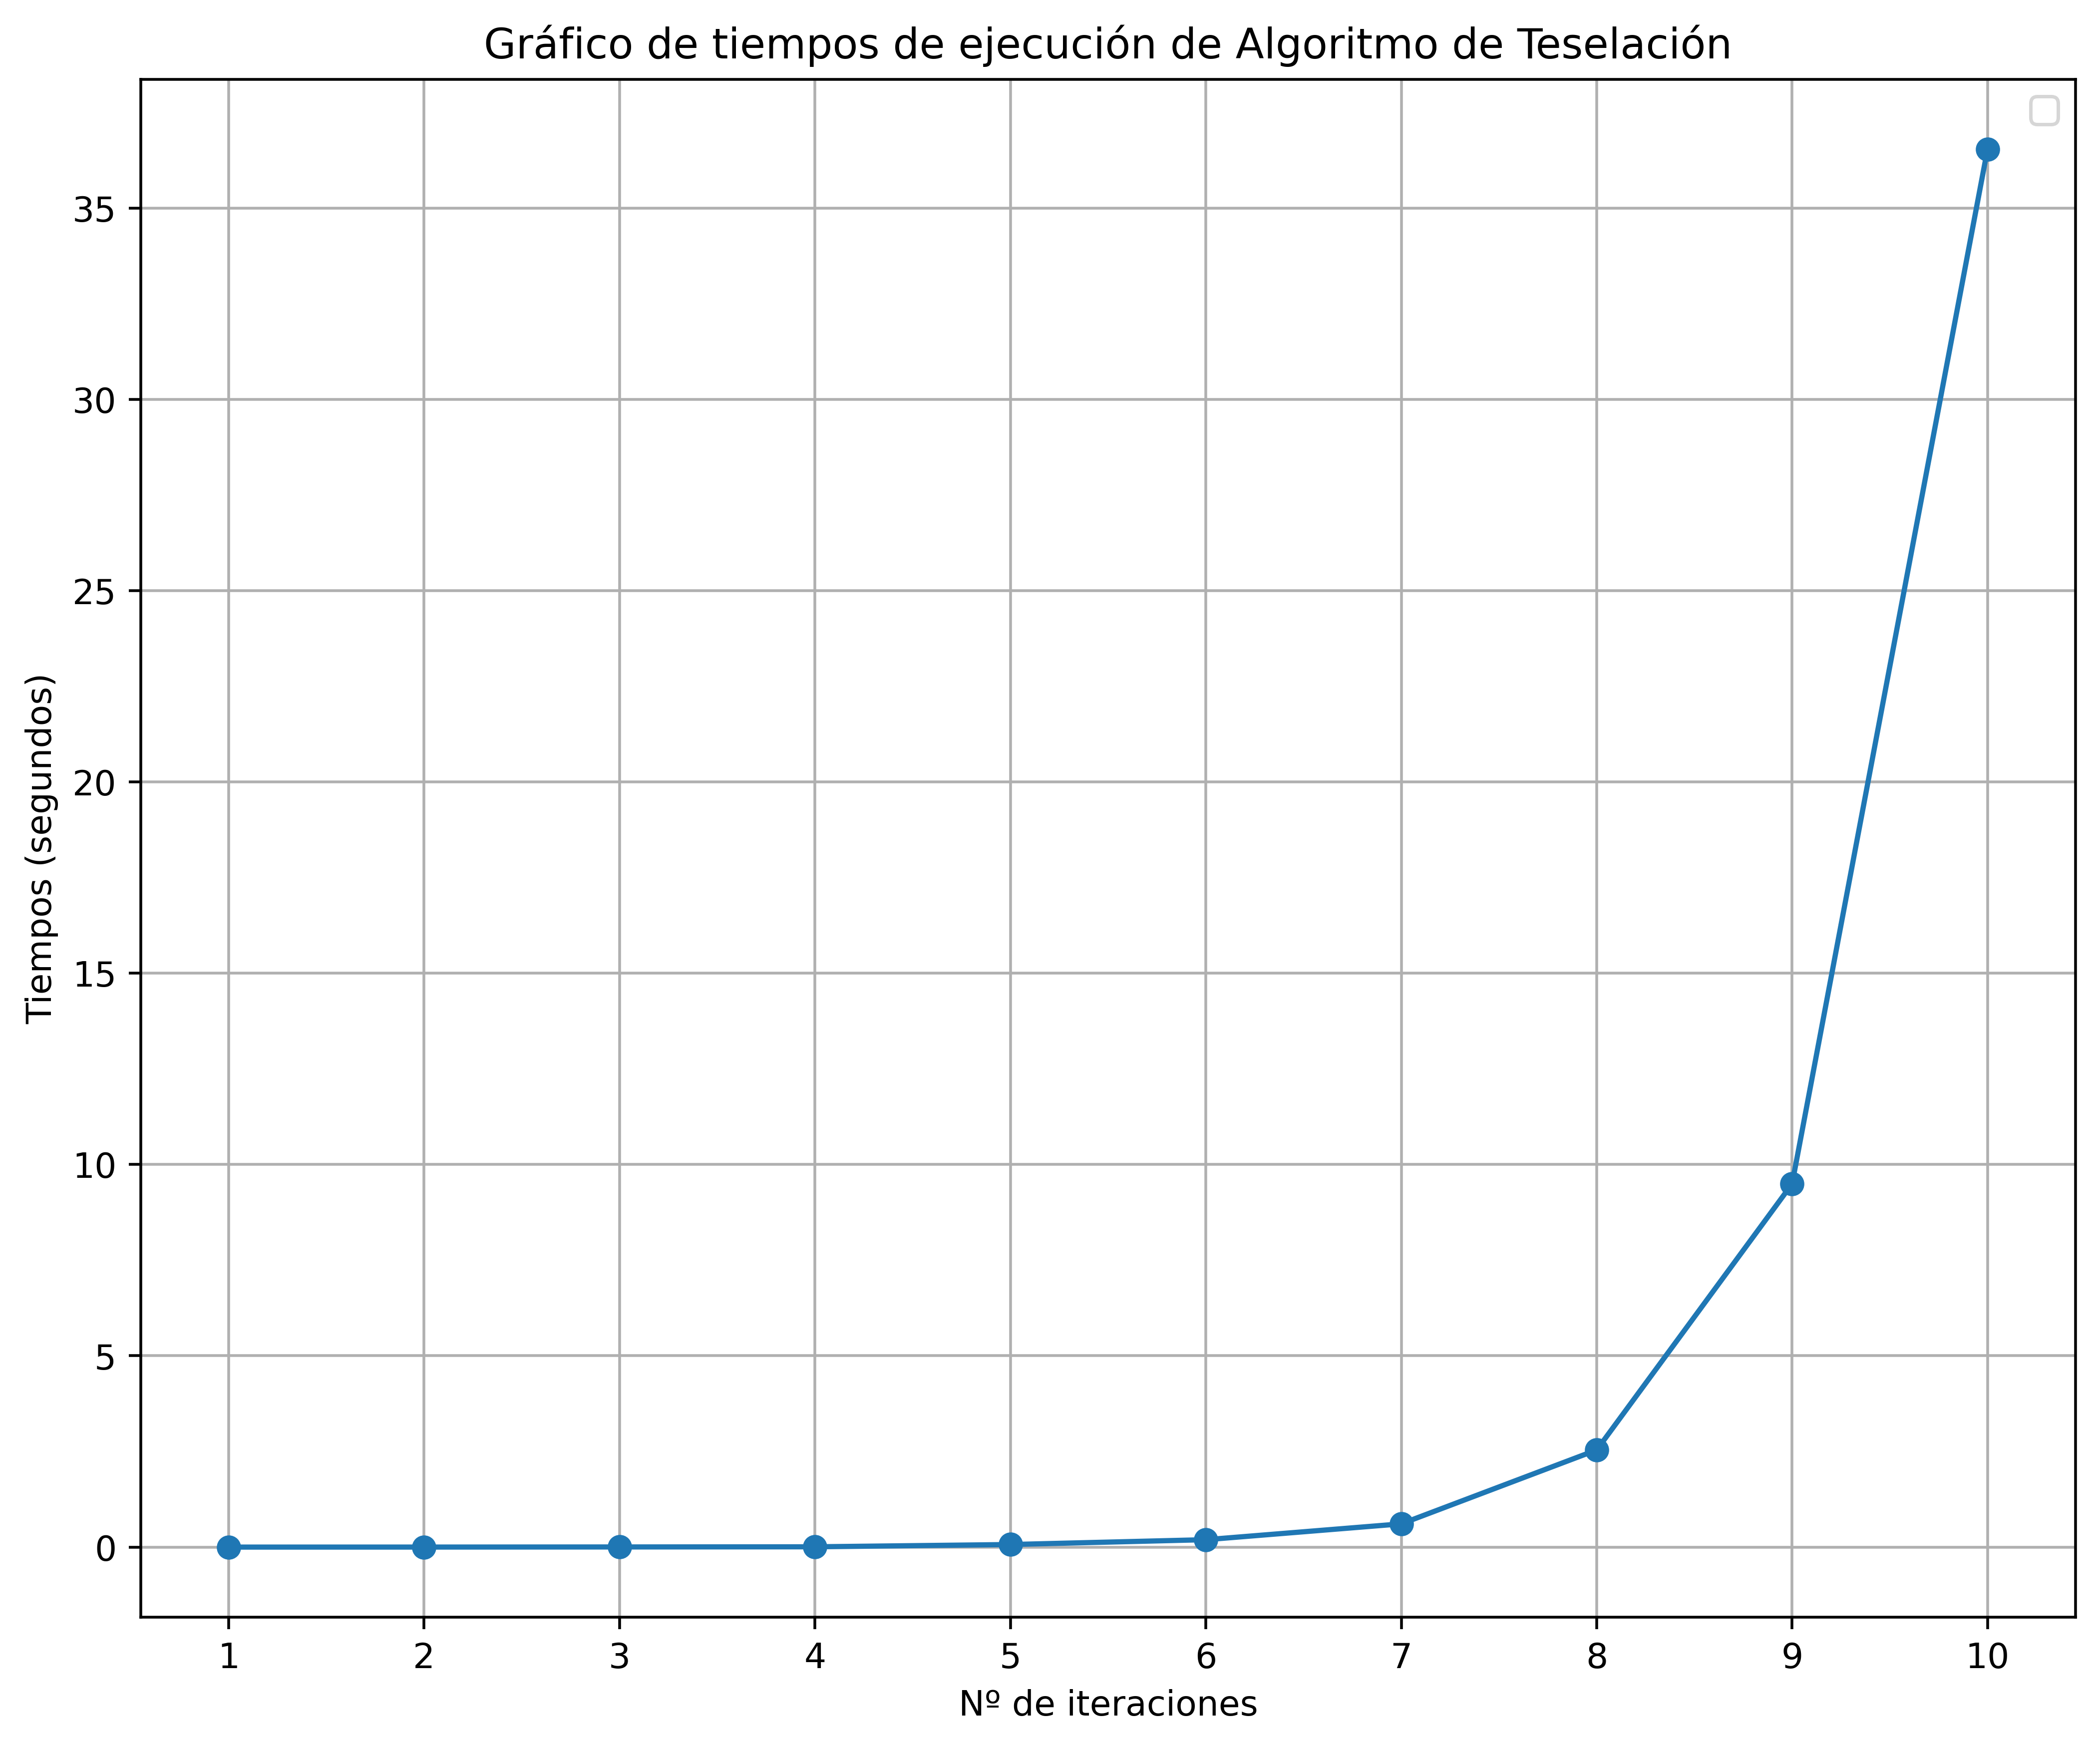

In [10]:
# plt.plot(dungeon_sizes, [i for i in range(dungeon_sizes)])
import matplotlib.pyplot as plt

# Crear el gráfico de líneas
plt.figure(figsize=(10,8), dpi=500)

plt.plot([str(k) for k in tesselation_timers.keys()], tesselation_timers.values(), marker="o")

# Agregar título y etiquetas
plt.title('Gráfico de tiempos de ejecución de Algoritmo de Teselación')
plt.xlabel('Nº de iteraciones')
plt.ylabel('Tiempos (segundos)')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()